 # Test Data Science - MP Data
 
### nba_logreg dataset

ANGUENOT Victor

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from mlxtend.plotting import plot_pca_correlation_graph
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import decomposition
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
# Returns confusion matrix and recall score

def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
    recall/=3
    print(confusion_mat)
    return(recall)

## 1. Importing Data

In [3]:
# Load dataset
df = pd.read_csv("nba_logreg.csv")

In [4]:
df # displays the data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


## 2. Data Info

In [5]:
df.shape

(1340, 21)

In [6]:
# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values #column names w/o TARGET_5Yrs nor Name
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values #matrix of the values of df w/o TARGET_5Yrs nor Name

In [7]:
print(paramset) #list of the parameters

['GP' 'MIN' 'PTS' 'FGM' 'FGA' 'FG%' '3P Made' '3PA' '3P%' 'FTM' 'FTA'
 'FT%' 'OREB' 'DREB' 'REB' 'AST' 'STL' 'BLK' 'TOV']


We have a table containing the names of players and several statistics about them, as well as a result corresponding to their presence in the NBA (1) or not (0) in 5 years time


- GP : Games played
- MIN : Minutes Played
- PTS : Point per game
- FGM : Field goals made
- FGA : Field goal attempts
- FG% : Field goal percent
- 3P Made : 3 point made
- 3PA : 3 point attempts
- 3P% : 3 point percent
- FTM : Free throw made
- FTA : Free throw attempts
- FT% : Free throw percent
- OREB : Offensive rebounds
- DREB : Defensive rebounds
- REB : Rebounds
- AST : Assists
- STL : Steals
- BLK : Blocks
- TOV : Turnovers
- TARGET_5Yrs : 1 if career >=5. else : 0

In [8]:
print(df_vals) # features before normalization

[[36.  27.4  7.4 ...  0.4  0.4  1.3]
 [35.  26.9  7.2 ...  1.1  0.5  1.6]
 [74.  15.3  5.2 ...  0.5  0.3  1. ]
 ...
 [43.  12.1  5.4 ...  0.3  0.4  0.9]
 [52.  12.   4.5 ...  0.4  0.1  0.8]
 [47.  11.7  4.4 ...  0.7  0.1  0.9]]


In [9]:
print(labels) # results (1 or 0)

[0. 0. 0. ... 0. 1. 1.]


In [10]:
# Information about the dataset

df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [11]:
# number of zeros in each column
print("Number of null values in the column GP:",sum(df['GP']==0))
print("Number of null values in the column MIN:",sum(df['MIN']==0))
print("Number of null values in the column PTS:",sum(df['PTS']==0))
print("Number of null values in the column FGM:",sum(df['FGM']==0))
print("Number of null values in the column FGA:",sum(df['FGA']==0))
print("Number of null values in the column FG%:",sum(df['FG%']==0))
print("Number of null values in the column 3P Made:",sum(df['3P Made']==0))
print("Number of null values in the column 3PA:",sum(df['3PA']==0))
print("Number of null values in the column 3P%:",sum(df['3P%']==0))
print("Number of null values in the column FTM:",sum(df['FTM']==0))
print("Number of null values in the column FTA:",sum(df['FTA']==0))
print("Number of null values in the column FT%:",sum(df['FT%']==0))
print("Number of null values in the column OREB:",sum(df['OREB']==0))
print("Number of null values in the column DREB:",sum(df['DREB']==0))
print("Number of null values in the column REB:",sum(df['REB']==0))
print("Number of null values in the column AST:",sum(df['AST']==0))
print("Number of null values in the column STL:",sum(df['STL']==0))
print("Number of null values in the column BLK:",sum(df['BLK']==0))
print("Number of null values in the column TOV:",sum(df['TOV']==0))

Number of null values in the column GP: 0
Number of null values in the column MIN: 0
Number of null values in the column PTS: 0
Number of null values in the column FGM: 0
Number of null values in the column FGA: 0
Number of null values in the column FG%: 0
Number of null values in the column 3P Made: 646
Number of null values in the column 3PA: 360
Number of null values in the column 3P%: 440
Number of null values in the column FTM: 1
Number of null values in the column FTA: 1
Number of null values in the column FT%: 1
Number of null values in the column OREB: 4
Number of null values in the column DREB: 0
Number of null values in the column REB: 0
Number of null values in the column AST: 4
Number of null values in the column STL: 4
Number of null values in the column BLK: 139
Number of null values in the column TOV: 0


In [12]:
df.groupby('TARGET_5Yrs').size()

TARGET_5Yrs
0.0    509
1.0    831
dtype: int64

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='count'>

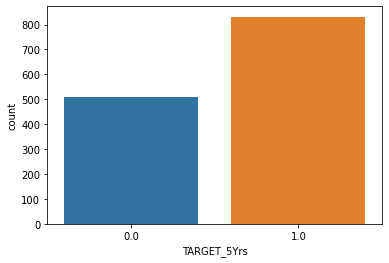

In [13]:
sns.countplot(df['TARGET_5Yrs'],label="Number")

##### Of the 1340 players of this dataset, 509 will not last more than 5 years, and 831 will.

## 3. Preprocessing

In [14]:
# Sorting inconsistent data
# replacing Nan values (only present when no 3 points attempts have been performed by a player)
for x in np.argwhere(np.isnan(df_vals)):
    df_vals[x]=0.0

In [15]:
# normalize dataset
sc = MinMaxScaler()
X = sc.fit_transform(df_vals)

In [16]:
#Normalization parameters are saved for reuse on new inputs.
with open('FLASK_APP/model/nba_classifier2.pkl', 'wb') as file:
    pickle.dump(sc, file)

## 4. Correlation matrix

In [17]:
corr = df.corr()

<AxesSubplot:>

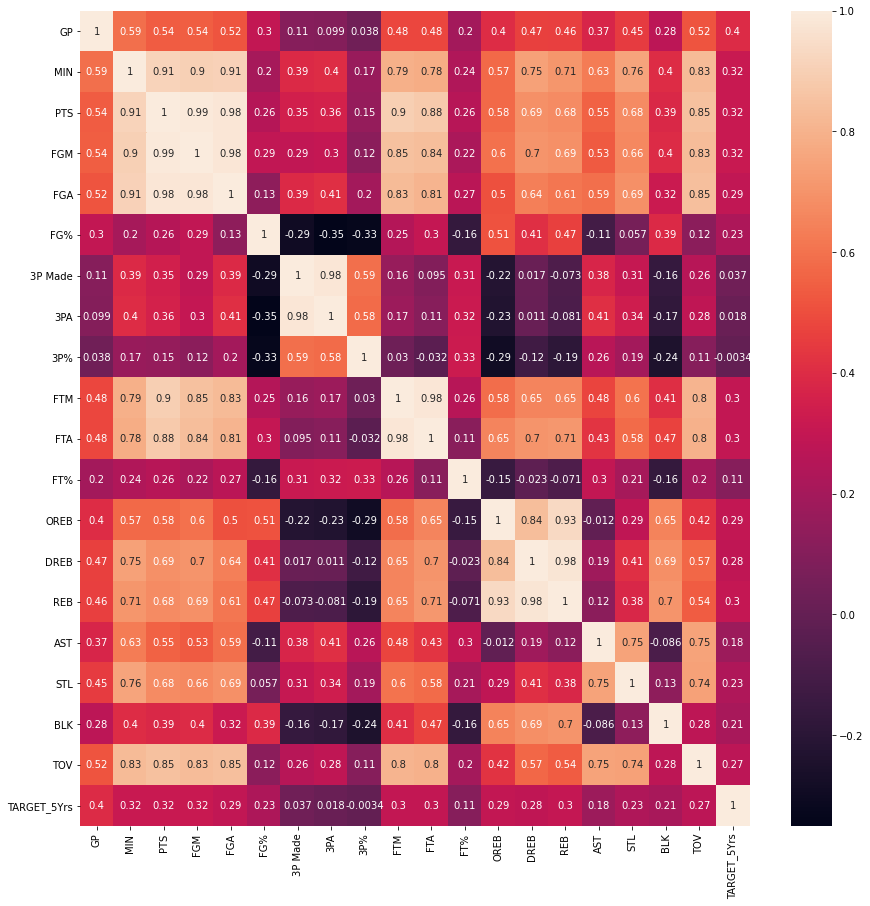

In [18]:
plt.figure(figsize=(15, 15))

sns.heatmap(corr, annot = True)

This matrix allow us to see which variables most influence the results.

For example, here, we can see that 'Games Played'is the variable most correlated with TARGET_5Yrs. Others variables, like 3 points made, seem to have less influence on the result.

## 5. Principal Component Analysis

In [19]:
pca = decomposition.PCA()
pc = pca.fit_transform(df_vals)

In [20]:
#Variance explained by each component of the PCA

print(pca.explained_variance_)

[4.33861877e+02 2.72781556e+02 1.08044273e+02 5.91262898e+01
 3.86993867e+01 4.09354032e+00 2.68859991e+00 9.46693294e-01
 5.53941550e-01 4.60768221e-01 1.15145770e-01 9.73856028e-02
 7.70819770e-02 5.71345921e-02 4.64227171e-02 1.09516096e-02
 3.65993014e-03 8.30444531e-04 7.63330226e-04]


In [21]:
# Percentage of variances explained with PCA

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[4.70736400e-01 2.95965640e-01 1.17227105e-01 6.41515152e-02
 4.19885013e-02 4.44145599e-03 2.91710775e-03 1.02715407e-03
 6.01021812e-04 4.99929552e-04 1.24932169e-04 1.05662540e-04
 8.36332812e-05 6.19905404e-05 5.03682483e-05 1.18824021e-05
 3.97099268e-06 9.01025165e-07 8.28206721e-07]


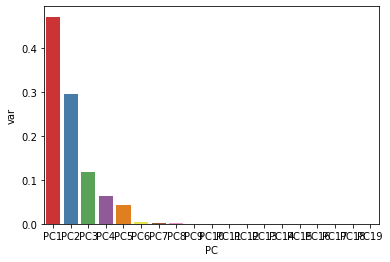

In [22]:
df2 = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13', 'PC14','PC15','PC16', 'PC17','PC18','PC19']})
sns.barplot(x='PC',y="var", 
           data=df2, color="c",palette="Set1");# Graph of eigenvalues/variances of main components

In [23]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13', 'PC14','PC15','PC16', 'PC17','PC18','PC19'])
pc_df['Cluster'] = labels
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,Cluster
0,15.699354,14.514199,-1.694292,16.354709,-6.123340,-4.972511,0.747910,-0.585532,0.595684,-0.301312,0.520635,-0.609656,-0.512082,0.356632,-0.399802,0.038955,-0.123127,0.024885,0.035549,0.0
1,15.684581,16.196386,-7.690329,15.392308,-12.218701,-4.967328,-0.914043,1.021690,2.153405,0.236825,0.012859,-0.666109,0.105284,0.528094,-0.034130,0.016051,-0.166190,-0.060990,-0.003664,0.0
2,-10.647941,-0.352361,7.535384,-8.716115,-1.352269,-0.065427,-0.105776,-0.817042,0.430590,0.543635,0.187315,-0.158281,-0.083766,-0.036674,0.048790,0.022646,-0.201219,-0.010330,-0.030772,0.0
3,3.156353,3.996886,0.976838,-4.803555,0.552397,2.520012,0.029639,-0.279583,-0.440360,-0.250601,-0.439736,-0.228973,0.077213,-0.050718,0.135276,-0.029413,-0.014268,0.015863,0.031955,1.0
4,16.951788,-14.748080,-8.929342,0.209581,7.387187,0.356435,-0.641127,0.027550,0.899181,0.172381,-0.004933,-0.074422,-0.026961,-0.016737,-0.035521,-0.023179,-0.023577,0.001065,0.002544,1.0


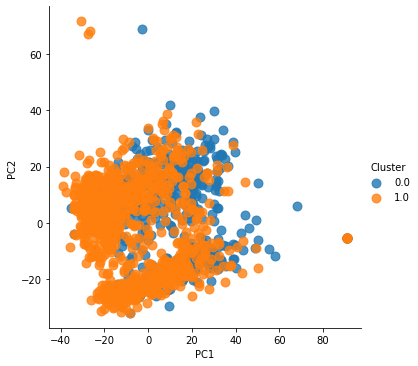

In [24]:
#Display of the two clusters obtained according to the first two components of the PCA

sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

#### We can see that when plotting the data in the benchmark formed bu the 2 main components of the PCA, the 2 groups are not clearly distinct. Thus, projecting the data in a two-dimensional space is not enough to have a good precision on the results.

(<Figure size 432x432 with 1 Axes>,
             Dim 1     Dim 2
 Name    -0.926828  0.307203
 GP      -0.731631  0.068710
 MIN     -0.677957  0.064832
 PTS     -0.668355  0.100643
 FGM     -0.670568  0.007340
 FGA     -0.390830  0.386542
 FG%     -0.327255 -0.528929
 3P Made -0.324881 -0.530217
 3PA     -0.345185 -0.912107
 3P%     -0.586539  0.145936
 FTM     -0.550124  0.223572
 FTA     -0.565632 -0.327780
 FT%     -0.364611  0.463763
 OREB    -0.495577  0.323145
 DREB    -0.465095  0.389330
 REB     -0.503750 -0.130088
 AST     -0.572572 -0.015180
 STL     -0.234728  0.370578
 BLK     -0.624201  0.090378)

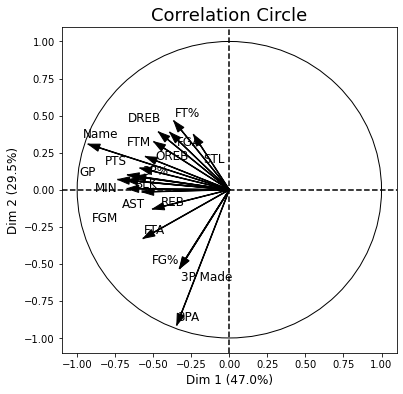

In [25]:
# Correlation circle according to the 2 main dimensions of the PCA

plot_pca_correlation_graph(df_vals, np.array(df.columns[0:19]))


We see in this correlation circle that the angles between the features are small. Indeed, features with a positive correlation are grouped together.
The 2 main dimensions of the PCA explain only (47+29,5) 76,5% of the total variance.

## 5. Supervised learning

In [26]:
validation_size = 0.20 # separation training/test 80/20
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, labels, test_size=validation_size)

In [27]:
# Logistic regression, one-vs-rest
score_classifier(X,LogisticRegression(solver='liblinear', multi_class='ovr'),labels)

[[254. 255.]
 [135. 696.]]


0.8374671545910527

In [28]:
# Logistic regression, bfgs solver
score_classifier(X,LogisticRegression(solver='lbfgs'),labels)

[[260. 249.]
 [137. 694.]]


0.8351030883971994

In [29]:
# SVM
score_classifier(X,SVC(),labels)

[[271. 238.]
 [145. 686.]]


0.82551959002102

In [30]:
# LDA
score_classifier(X,LinearDiscriminantAnalysis(),labels)

[[258. 251.]
 [153. 678.]]


0.8158041514990408

In [31]:
# K nearest neighbors
score_classifier(X,KNeighborsClassifier(),labels)

[[250. 259.]
 [184. 647.]]


0.7787731492986371

In [32]:
# Decision tree
score_classifier(X,DecisionTreeClassifier(),labels)

[[270. 239.]
 [279. 552.]]


0.6640581739006891

In [33]:
# Gaussian Naive Bayes
score_classifier(X,GaussianNB(),labels)

[[410.  99.]
 [406. 425.]]


0.5118239079434933

In [34]:
# 
score_classifier(X,DecisionTreeClassifier(),labels)

[[270. 239.]
 [275. 556.]]


0.6688503153008649

In [35]:
# Gradient Boosting
score_classifier(X,GradientBoostingClassifier(),labels)

[[275. 234.]
 [173. 658.]]


0.7916854614698376

In [36]:
# Ransom forest
score_classifier(X,RandomForestClassifier(),labels)

[[270. 239.]
 [179. 652.]]


0.7841373555592707

In [37]:
# Multi Layer Perceptron
score_classifier(X,MLPClassifier(max_iter=10000, alpha=1, random_state=0),labels)

[[250. 259.]
 [135. 696.]]


0.8374900597768872

#### Here, printing the recall score and the confusion matrix, the Multi Layer Perceptron seems to have the best results on the dataset.

Let's now plot the results of all the models tested, but with a kfold value different (10 vs 3 before)

In [38]:
# Different models

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LR2', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto'))) #change kernel ('rbf')
models.append(('DTC', DecisionTreeClassifier(max_depth = 4, random_state=0)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('RF', RandomForestClassifier()))
models.append(('MLP', MLPClassifier(max_iter=10000, alpha=1, random_state=0)))

In [39]:
seed = 0
results = []
names = []

In [40]:
# Not much data: kfold rather than train/test separation

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print(name, cv_results.mean(), "(", cv_results.std(),")") #mean + std

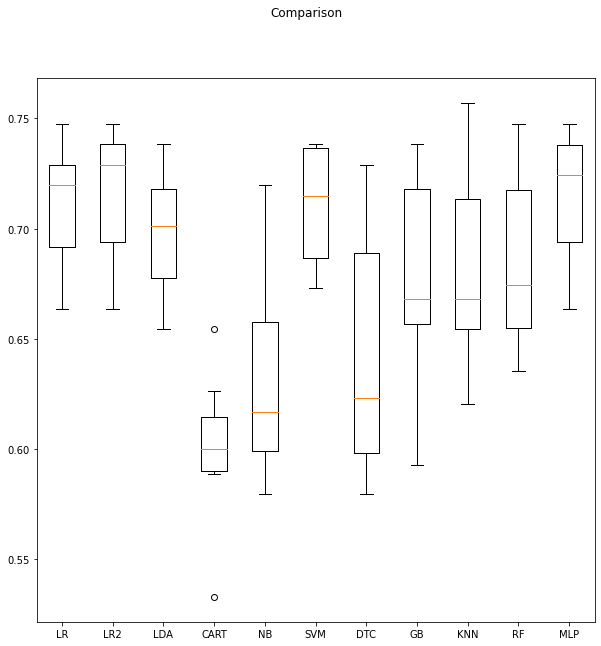

In [41]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

With this boxplot, we can see for each method the 1st and 3rd quantile and the median.

#### We will focus on the MLP model, which provides the best scores on the dataset.

In [42]:
# Build of the calssifier

classifier = MLPClassifier(max_iter=10000, alpha = 1, random_state=0)
classifier.fit(X_train, Y_train) # 80% of the data set
print("Accuracy on training set:", (classifier.score(X_train, Y_train)))
print("Accuracy on test set:", (classifier.score(X_test, Y_test)))

Accuracy on training set: 0.7192164179104478
Accuracy on test set: 0.7014925373134329


In [47]:
# Test of the model

player = np.array([36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3])
#player = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

player = player.reshape(1,-1) # reshape to have the good input dimension

In [48]:
# Normalization (with the same parameters as before)
player2 = sc.transform(player)

In [49]:
#Result : 1 if the player will last more than 5 years in the NBA / 0 otherwise

classifier.predict(player2)[0] # [0] to extract the number from the nparray

0.0

#### The model trained is saved to be used on the Flask web app with new inputs

In [46]:
with open('FLASK_APP/model/nba_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)

#### CONCLUSION

In this project, different methods of supervised classification were used.

We first looked at the different information contained in the dataset, in order to do a preprocessing to remove the outliers or inconsistent data.

Second, the data has been standardized so that the different methods could be applied. 

An Exploratory Data Analysis has been done to see the correlation between the different features of the dataset.


Subsequently, the dataset was separated into a training part and a test part (80% / 20%). Different methods of supervised classification were applied and the precision results for each were displayed. 
Finally, a Multi Layer Perceptron seemed to be the best classifier for this dataset, and has been kept in pkl format for the Flask web app.

This web app can be launched using 'python app.py' shell command. All the fields of the form must be filled in with a new player's statistics, and the model will display the result on the player's NBA performance or not in 5 years.